In [1]:
import sys
import os

# Add the src directory to Python path so model.py can find ssn and net modules
sys.path.append(os.path.abspath('../src'))

from src.model import model
from src.model_outerweights import model_outerweights
from src.greedy_insertion import insertion
from src.training_logger import run_training_with_logging

import numpy as np
from loguru import logger
import torch

In [2]:
# load the data
path = '../data_result/raw_data/VDP_beta_0.1_grid_combined.npy'# Initialize the weights
data = np.load(path)
logger.info(f"Loaded data with shape: {data.shape}, dtype: {data.dtype}")

2025-08-23 15:04:55.681 | INFO     | __main__:<module>:4 - Loaded data with shape: (1800,), dtype: [('x', '<f8', (2,)), ('dv', '<f8', (2,)), ('v', '<f8')]


In [3]:
# Initialize the parameter
power = 2.0
gamma = 5.0
M = 20 # number greedy insertion selected
alpha = 1e-5
regularization = (gamma, alpha) 
num_iterations = 10
loss_weights = (1.0, 1.0)
pruning_threshold = 1e-13

In [4]:
# Initialize the model 
model_1 = model(data, torch.relu, power, regularization, optimizer='Adam', loss_weights = loss_weights)
model_2 = model_outerweights(data, torch.relu, power, regularization, optimizer='SSN_TR', loss_weights = loss_weights)

2025-08-23 15:04:55 | INFO     | src.model:_configure_logger:83 - VDPModel initialized
2025-08-23 15:04:55 | INFO     | src.model_outerweights:_configure_logger:83 - VDPModel (outer weights) initialized


In [5]:
# Set up the initializing weights and bias
init_weights = np.random.randn(M, 2) * 0.1
init_bias = np.random.randn(M)

In [6]:
model_result, weight_raw, bias_raw, outerweight_raw = model_1.train(
    iterations=1000,
    display_every=200,
    inner_weights=init_weights, inner_bias=init_bias,
)
logger.info("Initialization done"); logger.info(f"Initial weights shape: {weight_raw.shape}, bias shape: {bias_raw.shape}")

2025-08-23 15:04:55 | INFO     | src.model:train:251 - Starting network training session
2025-08-23 15:04:55 | INFO     | src.model:_prepare_data:127 - Training set: 1620 samples, Validation set: 180 samples
2025-08-23 15:04:55 | INFO     | src.model:_prepare_data:130 - Data ranges - x: [-3.00, 3.00], v: [0.00, 10.96], dv: [-13.19, 13.19]
2025-08-23 15:04:55 | INFO     | src.model:_create_network:163 - Creating network with 20 neurons
2025-08-23 15:04:56 | INFO     | src.model:_setup_optimizer:186 - Using Adam optimizer with lr=0.0001
2025-08-23 15:04:56 | INFO     | src.model:train:269 - Training model, saving to /Users/ruizhechao/Documents/NNforHJB/train_history
2025-08-23 15:04:56 | INFO     | src.model:train:271 - Training hyperparameters: iterations=1000, batch_size=1620, display_every=200
2025-08-23 15:04:56 | INFO     | src.model:train:272 - Loss weights: value=1.0, gradient=1.0
2025-08-23 15:04:56 | INFO     | src.model:train:316 - Epoch 0: Train Loss = 31.794406, Val Loss = 33

In [7]:
# Training with improved logging
training_logger, weight_raw, bias_raw, outerweight_raw = run_training_with_logging(
    data, model_1, model_2, model_result, weight_raw, bias_raw, outerweight_raw,
    num_iterations, M, alpha, pruning_threshold, power, gamma
)

logger.info("Training completed with improved logging")

2025-08-23 15:04:56 | INFO     | src.training_logger:run_training_with_logging:96 - Iteration 0 - weights shape: (20, 2)
2025-08-23 15:04:56 | INFO     | src.model_outerweights:train:251 - Starting network training session (outer weights only)
2025-08-23 15:04:56 | INFO     | src.model_outerweights:_prepare_data:127 - Training set: 1620 samples, Validation set: 180 samples
2025-08-23 15:04:56 | INFO     | src.model_outerweights:_prepare_data:130 - Data ranges - x: [-3.00, 3.00], v: [0.00, 10.96], dv: [-13.19, 13.19]
2025-08-23 15:04:56 | INFO     | src.model_outerweights:_setup_optimizer:175 - Using SSN_TR optimizer with alpha=1e-05, gamma=5.0
2025-08-23 15:04:56 | INFO     | src.model_outerweights:train:267 - Training model, saving to /Users/ruizhechao/Documents/NNforHJB/train_history
2025-08-23 15:04:56 | INFO     | src.model_outerweights:train:269 - Training hyperparameters: iterations=1000, batch_size=1620, display_every=1000
2025-08-23 15:04:56 | INFO     | src.model_outerweights:

2025-08-23 15:41:07 | INFO     | __main__:<module>:4 - Final weights shape: (38, 2)
2025-08-23 15:41:07 | INFO     | __main__:<module>:5 - Final bias shape: (38,)
2025-08-23 15:41:07 | INFO     | __main__:<module>:6 - Training history contains 9 iterations
2025-08-23 15:41:07 | INFO     | src.plot_value_function:plot_training_results:240 - === Plotting Training Results ===
2025-08-23 15:41:07 | INFO     | src.plot_value_function:get_best_iteration:46 - Best iteration: 8 with 38 neurons
2025-08-23 15:41:07 | INFO     | src.plot_value_function:plot_training_results:257 - Plotting iteration 8:
2025-08-23 15:41:07 | INFO     | src.plot_value_function:plot_training_results:258 - Weights shape: (38, 2), Biases shape: (38,)
2025-08-23 15:41:07 | INFO     | src.plot_value_function:plot_training_results:259 - Activation: relu, Power: 2.0
2025-08-23 15:41:08 | INFO     | src.plot_value_function:plot_value_function_3d:162 - 3D plot saved to ../data_result/visualizations/value_function_3d_iter_8.p

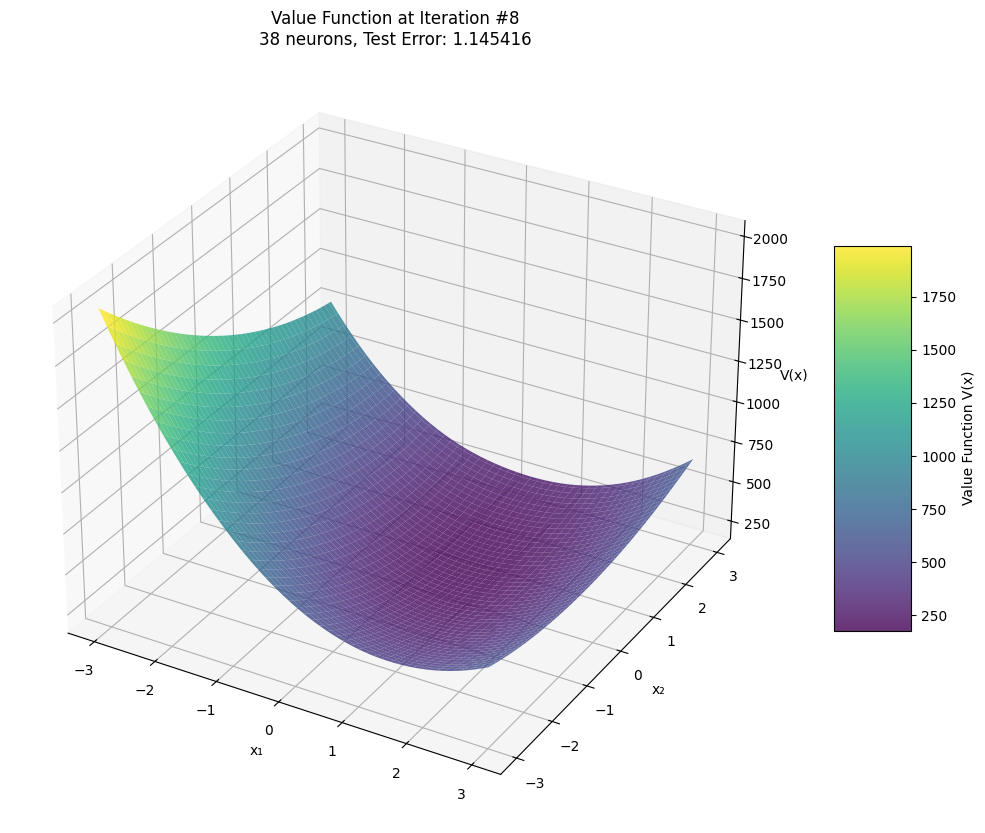

2025-08-23 15:41:08 | INFO     | src.plot_value_function:plot_value_function_contour:220 - Contour plot saved to ../data_result/visualizations/value_function_contour_iter_8.png


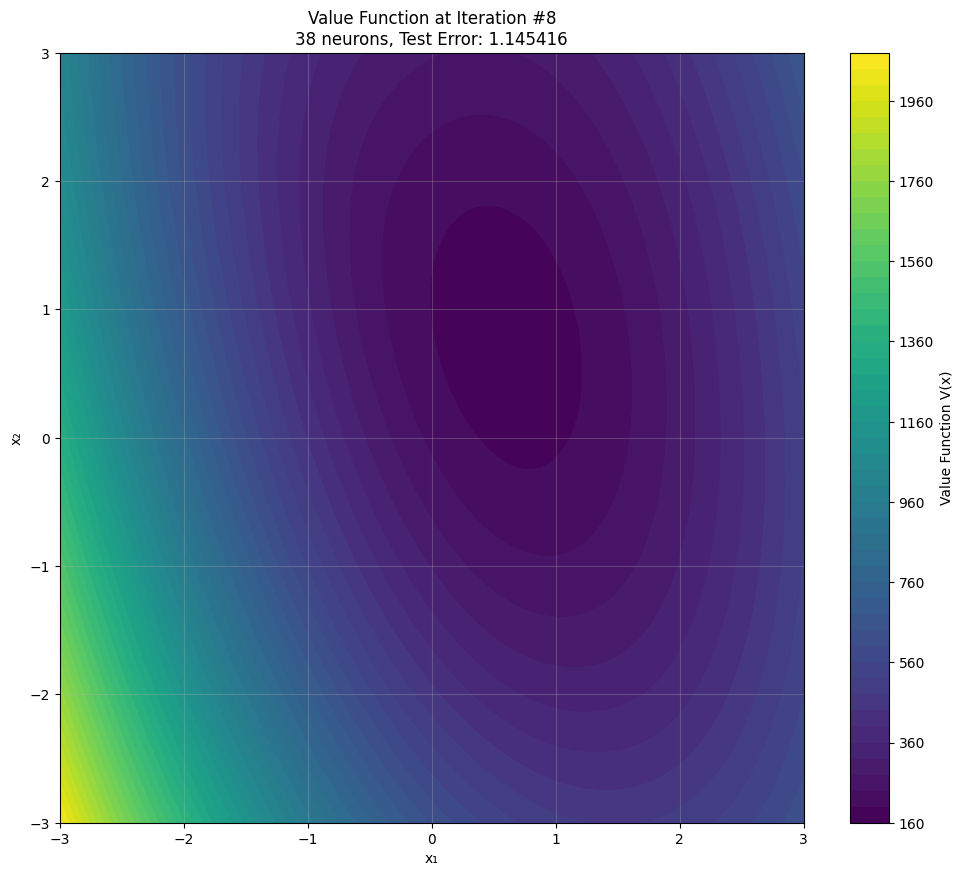

2025-08-23 15:41:08 | INFO     | src.plot_value_function:plot_training_results:293 - Plotting Summary:
2025-08-23 15:41:08 | INFO     | src.plot_value_function:plot_training_results:294 - - Best iteration: 8
2025-08-23 15:41:08 | INFO     | src.plot_value_function:plot_training_results:295 - - Total iterations: 9
2025-08-23 15:41:08 | INFO     | src.plot_value_function:plot_training_results:296 - - 3D plot saved: ../data_result/visualizations/value_function_3d_iter_8.png
2025-08-23 15:41:08 | INFO     | src.plot_value_function:plot_training_results:297 - - Contour plot saved: ../data_result/visualizations/value_function_contour_iter_8.png
2025-08-23 15:41:08 | INFO     | __main__:<module>:11 - Training and visualization completed successfully!


In [9]:
# Display training summary and create plots
from src.plot_value_function import plot_training_results

logger.info(f"Final weights shape: {weight_raw.shape}")
logger.info(f"Final bias shape: {bias_raw.shape}")
logger.info(f"Training history contains {len(training_logger.history['weights'])} iterations")

# Create value function plots
plot_results = plot_training_results(training_logger, show_plots=True)

logger.info("Training and visualization completed successfully!")